In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np

In [3]:
hotel_bookings = pd.read_csv('../data/' + 'hotel_bookings.csv')

In [4]:
print(type(hotel_bookings))
hotel_bookings.head()

<class 'pandas.core.frame.DataFrame'>


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
path = '../data/hotel_bookings.csv'
df = pd.read_csv(path)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df2 = df.copy()

In [8]:
df2 = df2[['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 
         'arrival_date_day_of_month','stays_in_weekend_nights','adults', 'children', 'babies', 'customer_type','reserved_room_type', 'adr']]
df2.head()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,adults,children,babies,customer_type,reserved_room_type,adr
0,Resort Hotel,0,2015,July,1,0,2,0.0,0,Transient,C,0.0
1,Resort Hotel,0,2015,July,1,0,2,0.0,0,Transient,C,0.0
2,Resort Hotel,0,2015,July,1,0,1,0.0,0,Transient,A,75.0
3,Resort Hotel,0,2015,July,1,0,1,0.0,0,Transient,A,75.0
4,Resort Hotel,0,2015,July,1,0,2,0.0,0,Transient,A,98.0


# Clean the data

In [9]:
## 没付钱的就直接drop
no_pay = list(df2.loc[df2['adr']==0].index)
df2.drop(df2.index[no_pay], inplace=True)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117431 entries, 2 to 119389
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      117431 non-null  object 
 1   is_canceled                117431 non-null  int64  
 2   arrival_date_year          117431 non-null  int64  
 3   arrival_date_month         117431 non-null  object 
 4   arrival_date_day_of_month  117431 non-null  int64  
 5   stays_in_weekend_nights    117431 non-null  int64  
 6   adults                     117431 non-null  int64  
 7   children                   117427 non-null  float64
 8   babies                     117431 non-null  int64  
 9   customer_type              117431 non-null  object 
 10  reserved_room_type         117431 non-null  object 
 11  adr                        117431 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 11.6+ MB


In [11]:
df2.loc[:, 'arrival_date_month'].value_counts()

August       13711
July         12491
May          11611
April        10953
October      10929
June         10819
September    10351
March         9642
February      7921
November      6641
December      6561
January       5801
Name: arrival_date_month, dtype: int64

In [12]:
month = df2[['arrival_date_month', 'reserved_room_type']]

In [13]:
data = df2.copy()

In [14]:
# convert month to number 
data.loc[data['arrival_date_month']=='January', 'arrival_date_month'] = '01'
data.loc[data['arrival_date_month']=='February', 'arrival_date_month'] = '02'
data.loc[data['arrival_date_month']=='March', 'arrival_date_month'] = '03'
data.loc[data['arrival_date_month']=='April', 'arrival_date_month'] = '04'
data.loc[data['arrival_date_month']=='May', 'arrival_date_month'] = '05'
data.loc[data['arrival_date_month']=='June', 'arrival_date_month'] = '06'
data.loc[data['arrival_date_month']=='July', 'arrival_date_month'] = '07'
data.loc[data['arrival_date_month']=='August', 'arrival_date_month'] = '08'
data.loc[data['arrival_date_month']=='September', 'arrival_date_month'] = '09'
data.loc[data['arrival_date_month']=='October', 'arrival_date_month'] = '10'
data.loc[data['arrival_date_month']=='November', 'arrival_date_month'] = '11'
data.loc[data['arrival_date_month']=='December', 'arrival_date_month'] = '12'

In [15]:
# convert day format
data.loc[data['arrival_date_day_of_month']== 1, 'arrival_date_day_of_month'] = '01'
data.loc[data['arrival_date_day_of_month']== 2, 'arrival_date_day_of_month'] = '02'
data.loc[data['arrival_date_day_of_month']== 3, 'arrival_date_day_of_month'] = '03'
data.loc[data['arrival_date_day_of_month']== 4, 'arrival_date_day_of_month'] = '04'
data.loc[data['arrival_date_day_of_month']== 5, 'arrival_date_day_of_month'] = '06'
data.loc[data['arrival_date_day_of_month']== 7, 'arrival_date_day_of_month'] = '07'
data.loc[data['arrival_date_day_of_month']== 8, 'arrival_date_day_of_month'] = '08'
data.loc[data['arrival_date_day_of_month']== 9, 'arrival_date_day_of_month'] = '09'

In [16]:
data.insert(data.shape[1], 'd', '/')

In [17]:
data['arrival_date'] = data['arrival_date_day_of_month'].map(str) + data['d'] + data['arrival_date_month'].map(str) + data['d'] + data['arrival_date_year'].map(str)
#data.head()

In [18]:
data['total_guests'] = data['adults'] + data['children'] + data['babies']

In [19]:
data.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'd'], axis=1, inplace=True)
#data.head()

In [20]:
data['arrival_month'] = month['arrival_date_month']
#data.head()

In [21]:
data.head()

,hotel,is_canceled,stays_in_weekend_nights,adults,children,babies,customer_type,reserved_room_type,adr,arrival_date,total_guests,arrival_month
2,Resort Hotel,0,0,1,0.0,0,Transient,A,75.0,01/07/2015,1.0,July
3,Resort Hotel,0,0,1,0.0,0,Transient,A,75.0,01/07/2015,1.0,July
4,Resort Hotel,0,0,2,0.0,0,Transient,A,98.0,01/07/2015,2.0,July
5,Resort Hotel,0,0,2,0.0,0,Transient,A,98.0,01/07/2015,2.0,July
6,Resort Hotel,0,0,2,0.0,0,Transient,C,107.0,01/07/2015,2.0,July


In [22]:
data1 = data.copy()
data1.loc[:, 'is_canceled'].value_counts()

0    73420
1    44011
Name: is_canceled, dtype: int64

In [23]:
# 取消预定的不算
data1 = data1.loc[data['is_canceled']==0]
clean_data = data1.copy()
clean_data.drop('is_canceled', axis=1, inplace=True)
clean_data.head()

,hotel,stays_in_weekend_nights,adults,children,babies,customer_type,reserved_room_type,adr,arrival_date,total_guests,arrival_month
2,Resort Hotel,0,1,0.0,0,Transient,A,75.0,01/07/2015,1.0,July
3,Resort Hotel,0,1,0.0,0,Transient,A,75.0,01/07/2015,1.0,July
4,Resort Hotel,0,2,0.0,0,Transient,A,98.0,01/07/2015,2.0,July
5,Resort Hotel,0,2,0.0,0,Transient,A,98.0,01/07/2015,2.0,July
6,Resort Hotel,0,2,0.0,0,Transient,C,107.0,01/07/2015,2.0,July


In [24]:
# Resort Hotel
rh = clean_data.loc[clean_data['hotel']=='Resort Hotel']
rh.head()

,hotel,stays_in_weekend_nights,adults,children,babies,customer_type,reserved_room_type,adr,arrival_date,total_guests,arrival_month
2,Resort Hotel,0,1,0.0,0,Transient,A,75.0,01/07/2015,1.0,July
3,Resort Hotel,0,1,0.0,0,Transient,A,75.0,01/07/2015,1.0,July
4,Resort Hotel,0,2,0.0,0,Transient,A,98.0,01/07/2015,2.0,July
5,Resort Hotel,0,2,0.0,0,Transient,A,98.0,01/07/2015,2.0,July
6,Resort Hotel,0,2,0.0,0,Transient,C,107.0,01/07/2015,2.0,July


In [25]:
# City Hotel
ch = clean_data.loc[clean_data['hotel']=='City Hotel']
ch.head()

,hotel,stays_in_weekend_nights,adults,children,babies,customer_type,reserved_room_type,adr,arrival_date,total_guests,arrival_month
40066,City Hotel,0,1,0.0,0,Transient-Party,A,58.67,02/07/2015,1.0,July
40070,City Hotel,0,2,0.0,0,Transient-Party,A,86.00,03/07/2015,2.0,July
40071,City Hotel,0,2,0.0,0,Transient-Party,A,43.00,03/07/2015,2.0,July
40072,City Hotel,0,2,0.0,0,Transient-Party,A,86.00,03/07/2015,2.0,July
40073,City Hotel,0,1,0.0,0,Transient-Party,A,63.00,03/07/2015,1.0,July


# Which room types are booked the most?

In [26]:
clean_data.head()

,hotel,stays_in_weekend_nights,adults,children,babies,customer_type,reserved_room_type,adr,arrival_date,total_guests,arrival_month
2,Resort Hotel,0,1,0.0,0,Transient,A,75.0,01/07/2015,1.0,July
3,Resort Hotel,0,1,0.0,0,Transient,A,75.0,01/07/2015,1.0,July
4,Resort Hotel,0,2,0.0,0,Transient,A,98.0,01/07/2015,2.0,July
5,Resort Hotel,0,2,0.0,0,Transient,A,98.0,01/07/2015,2.0,July
6,Resort Hotel,0,2,0.0,0,Transient,C,107.0,01/07/2015,2.0,July


In [27]:
df2 = clean_data

In [28]:
df2['reserved_room_type'].describe()

count     73420
unique        9
top           A
freq      51097
Name: reserved_room_type, dtype: object

In [29]:
df9 = df2['reserved_room_type'].value_counts()

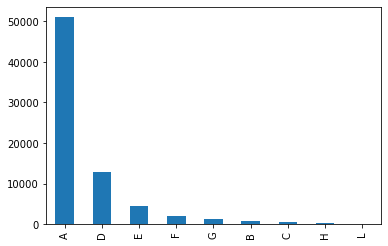

In [30]:
df9.plot(kind = 'bar', rot = 90)

# Customer Type

In [31]:
import matplotlib.pyplot as plt

In [32]:
df2['customer_type'].describe()

count         73420
unique            4
top       Transient
freq          51806
Name: customer_type, dtype: object

In [33]:
df2['customer_type'].value_counts()

Transient          51806
Transient-Party    18321
Contract            2791
Group                502
Name: customer_type, dtype: int64

In [34]:
df10 = df2

In [ ]:
df10.plot(kind = 'barh', rot = 90)